In [2]:
# Imort libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, classification_report

In [3]:
# Read data
file_path = "../Data/raw/creditcard.csv"
data = pd.read_csv(file_path)

In [4]:
# View data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Shape
data.shape

(284807, 31)

In [6]:
# Metadata information
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Columns: 31 entries, Time to Class
dtypes: float64(30), int64(1)
memory usage: 67.4 MB


In [7]:
# Summary statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Check for duplicates
data.duplicated().sum()

1081

In [9]:
# Drop the duplicates
data.drop_duplicates(inplace=True, ignore_index=True)

In [10]:
# Check for missing values
missing_na = data.isnull().sum() 
missing_na[missing_na > 0]

Series([], dtype: int64)

In [11]:
# Reset the index
data.reset_index(drop=True, inplace=True)

In [76]:
# Split the data into X and y
X = data.drop(labels=['Time', 'Class'], axis=1)
y = data['Class'].copy()

In [77]:
# Split the data into training, validation and test dataset
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

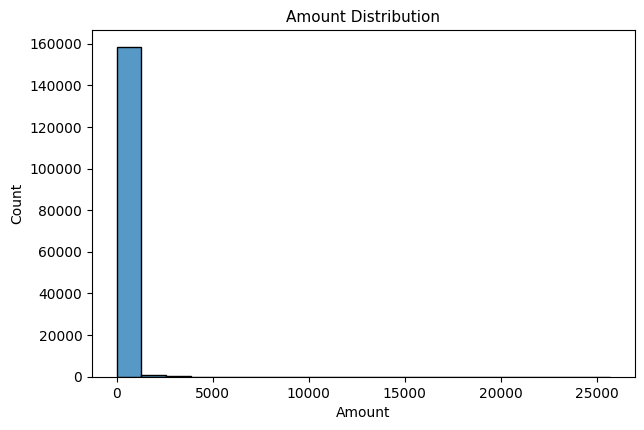

In [14]:
# Distribution of Amount variable
plt.figure(figsize=(7, 4.5))
sns.histplot(data=X_train, x='Amount', bins=20)
plt.title("Amount Distribution", size=11);

In [15]:
# Check for records with maximum value of amount
max_value = X_train.Amount.max()
X_train.loc[X_train.Amount == max_value]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
273745,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,-12.005487,...,-54.49772,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16


In [16]:
# Check for records greater than 100
X_train.loc[X_train.Amount > 100].shape[0]

31645

In [18]:
# Let's remove the outliers
def remove_outlier(col, data):

    Q1 = np.quantile(data[col], q=0.25)
    Q3 = np.quantile(data[col], q=0.75)

    IQR = Q3 - Q1

    # Compute upper and lower range
    upper_range = Q3 + IQR*1.5
    lower_range = Q1 - IQR*1.5

    # Filter the data for above range
    data[col] = np.where(data[col] > upper_range, upper_range, data[col])
    data[col] = np.where(data[col] < lower_range, lower_range, data[col])

    return data[col]

In [19]:
features  = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in features:
    X_train[col] = remove_outlier(col, X_train)
    X_val[col] = remove_outlier(col, X_val)
    X_test[col] = remove_outlier(col, X_test)

In [20]:
# Apply standard scaler
scaler = StandardScaler()

# Fit the model on training data
scaler = scaler.fit(X_train, y_train)

# Transform data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Convert them into dataframe
X_train_ = pd.DataFrame(X_train_scaled, columns=features)
X_val_ = pd.DataFrame(X_val_scaled, columns=features)
X_test_ = pd.DataFrame(X_test_scaled, columns=features)

In [20]:
# Model selection
models = {
    'LR': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'RF': RandomForestClassifier(random_state=42),
    'GB': GradientBoostingClassifier(random_state=42),
    'ET': ExtraTreesClassifier(random_state=42),
    'DT' : DecisionTreeClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'NB' : GaussianNB(),
    'XGB': XGBClassifier(random_state=42) 
}

classifiers_scores = []
for name, model in models.items():
    print(f'{name} fitting on training data...')
    scores = cross_val_score(estimator=model, X=X_train_, y=y_train, cv=10, scoring='f1_macro', n_jobs=-1)
    classifiers_scores.append((name, np.mean(scores)))
    print(f'F1-Score for {name} classifier:: {np.mean(scores)} +-({np.std(scores)})')
    print('---' * 10)


LR fitting on training data...


KeyboardInterrupt: 

### XGBoost Classifier

XGBoost classifier performs best with 92% accuracy. So, let's further evaluate the performance of model using XGBClassifier.

Test the model on validation data to ensure that model does not overfit the data.

In [25]:
# Run model to check overfitting.
xgb_clf = XGBClassifier(max_depth=3, random_state=42)
xgb_clf = xgb_clf.fit(X_train_, y_train)

# Make predictions
y_preds = xgb_clf.predict(X_val_)
y_train_preds = xgb_clf.predict(X_train_)

# Compute the accuracy - Training
train_recall = recall_score(y_train, y_train_preds)
train_f1score = f1_score(y_train, y_train_preds)
train_report = classification_report(y_train, y_train_preds)

# on Validation
recall = recall_score(y_val, y_preds)
f1score = f1_score(y_val, y_preds)
report = classification_report(y_val, y_preds)

In [26]:
# Recall Score
print("Recall Score")
print('Training :: %.3f' %train_recall)
print('Validation :: %.3f' %recall)
print("---" * 10)
# F1-Score
print("F1-Score")
print('Training :: %.3f' %train_f1score)
print('Validation :: %.3f' %f1score)

Recall Score
Training :: 0.970
Validation :: 0.789
------------------------------
F1-Score
Training :: 0.981
Validation :: 0.866


In [27]:
print("Training Report::\n", train_report)
print("---" * 10)
print("Validation Report::\n", report)

Training Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    159324
           1       0.99      0.97      0.98       271

    accuracy                           1.00    159595
   macro avg       1.00      0.99      0.99    159595
weighted avg       1.00      1.00      1.00    159595

------------------------------
Validation Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53109
           1       0.96      0.79      0.87        90

    accuracy                           1.00     53199
   macro avg       0.98      0.89      0.93     53199
weighted avg       1.00      1.00      1.00     53199



In [28]:
data.Class.value_counts(normalize=True) * 100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

The given dataset is highly imbalance as it contain 99.8% of genuine transactions and only 0.1% fradualent transactions.

Imbalance data causes ovefitting, which leads to inaccurate predictions on new unseen data. 

We can observed in our clasification scores for training and validation dataset. Here, the recall accuracy for class 1 in training data is 97% which drop to 79% for validation data indicating overfitting model, unable to find true patterns and relationship between the features and dependent variable.

To avoid overfitting, we can apply:
- Resampling methods.
- Adjust the class weight parameters of algorithm.

In [29]:
# Model evaluation
from sklearn.metrics import precision_score

def get_score(y_true, y_pred):
    
    recallScore = recall_score(y_true, y_pred)
    f1Score = f1_score(y_true, y_pred)
    precisionScore = precision_score(y_true, y_pred)
    classifier_report = classification_report(y_true, y_pred)

    return recallScore, f1Score, precisionScore, classifier_report



def eval_model(model):

    # fit the model on training data
    model = model.fit(X_train_, y_train)
    
    # make predictions on training and validation data
    y_train_preds = model.predict(X_train_)
    y_val_preds = model.predict(X_val_)

    # Training scores
    train_recall, train_f1score, train_precision, train_report = get_score(y_train, y_train_preds)
    val_recall, val_f1score, val_precision, val_report = get_score(y_val, y_val_preds)

    # Recall Score
    print("Recall Score")
    print('Training :: %.3f' %train_recall)
    print('Validation :: %.3f' %val_recall)
    print("---" * 10)

    # Precision Score
    print("Precision Score")
    print('Training :: %.3f' %train_precision)
    print('Validation :: %.3f' %val_precision)
    print("---" * 10)
    
    # F1-Score
    print("F1-Score")
    print('Training :: %.3f' %train_f1score)
    print('Validation :: %.3f' %val_f1score)

    print("---" * 10)
    print("Training Report::\n", train_report)
    print("---" * 10)
    print("Validation Report::\n", val_report)

    return model

In [30]:
# Calcuate the class weight
positive_instances = sum(y_train == 1)
negative_instances = sum(y_train == 0)

scale_pos_weight_value =  negative_instances / positive_instances

In [31]:
# Set class weight parameters
# Create model instance
xgb_model = XGBClassifier(n_estimators=100, 
                          max_depth=3, 
                          scale_pos_weight=scale_pos_weight_value, 
                          n_jobs = -1, random_state=42)

# Model evaluation
xgb_model = eval_model(xgb_model)

Recall Score
Training :: 1.000
Validation :: 0.833
------------------------------
Precision Score
Training :: 0.749
Validation :: 0.708
------------------------------
F1-Score
Training :: 0.856
Validation :: 0.765
------------------------------
Training Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    159324
           1       0.75      1.00      0.86       271

    accuracy                           1.00    159595
   macro avg       0.87      1.00      0.93    159595
weighted avg       1.00      1.00      1.00    159595

------------------------------
Validation Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53109
           1       0.71      0.83      0.77        90

    accuracy                           1.00     53199
   macro avg       0.85      0.92      0.88     53199
weighted avg       1.00      1.00      1.00     53199



In [32]:
# Set parameter: Learning Rate = 0.1
xgb_model_02 = XGBClassifier(n_estimators=100, 
                          learning_rate=0.1,
                          max_depth=3, 
                          scale_pos_weight=scale_pos_weight_value, 
                          n_jobs = -1, random_state=42)

# Model evaluation
xgb_model_02 = eval_model(xgb_model_02)

Recall Score
Training :: 1.000
Validation :: 0.889
------------------------------
Precision Score
Training :: 0.263
Validation :: 0.255
------------------------------
F1-Score
Training :: 0.417
Validation :: 0.396
------------------------------
Training Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    159324
           1       0.26      1.00      0.42       271

    accuracy                           1.00    159595
   macro avg       0.63      1.00      0.71    159595
weighted avg       1.00      1.00      1.00    159595

------------------------------
Validation Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53109
           1       0.25      0.89      0.40        90

    accuracy                           1.00     53199
   macro avg       0.63      0.94      0.70     53199
weighted avg       1.00      1.00      1.00     53199



In [33]:
# Update Learning Rate to 0.01
xgb_model_02 = XGBClassifier(n_estimators=100, 
                            learning_rate=0.01,
                            max_depth=3, 
                            scale_pos_weight=scale_pos_weight_value, 
                            n_jobs = -1, 
                            random_state=42)

# Model evaluation
xgb_model_02 = eval_model(xgb_model_02)

Recall Score
Training :: 0.923
Validation :: 0.844
------------------------------
Precision Score
Training :: 0.067
Validation :: 0.063
------------------------------
F1-Score
Training :: 0.125
Validation :: 0.117
------------------------------
Training Report::
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    159324
           1       0.07      0.92      0.13       271

    accuracy                           0.98    159595
   macro avg       0.53      0.95      0.56    159595
weighted avg       1.00      0.98      0.99    159595

------------------------------
Validation Report::
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     53109
           1       0.06      0.84      0.12        90

    accuracy                           0.98     53199
   macro avg       0.53      0.91      0.55     53199
weighted avg       1.00      0.98      0.99     53199



In [34]:
# Set Parameter - subsample= 0.6
xgb_model_03 = XGBClassifier(n_estimators=200, 
                                learning_rate=0.01,
                                subsample=0.6,
                                max_depth=3, 
                                scale_pos_weight=scale_pos_weight_value, 
                                n_jobs = -1, 
                                random_state=42)

# Model evaluation
xgb_model_03 = eval_model(xgb_model_02)

Recall Score
Training :: 0.923
Validation :: 0.844
------------------------------
Precision Score
Training :: 0.067
Validation :: 0.063
------------------------------
F1-Score
Training :: 0.125
Validation :: 0.117
------------------------------
Training Report::
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    159324
           1       0.07      0.92      0.13       271

    accuracy                           0.98    159595
   macro avg       0.53      0.95      0.56    159595
weighted avg       1.00      0.98      0.99    159595

------------------------------
Validation Report::
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     53109
           1       0.06      0.84      0.12        90

    accuracy                           0.98     53199
   macro avg       0.53      0.91      0.55     53199
weighted avg       1.00      0.98      0.99     53199



#### Hyperparamter tunning

In [52]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': range(100, 1201),
    'max_depth': range(3, 9, 2)
}

XGB_clf = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1, 
    scale_pos_weight=scale_pos_weight_value,
    random_state=42
)

random_searchCV = RandomizedSearchCV(estimator=XGB_clf, 
                                    param_distributions=params, 
                                    random_state=42, scoring='f1_macro',
                                    cv=5)

# Fit on the training data
random_searchCV.fit(X_train_, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'max_depth': range(3, 9, 2),
                                        'n_estimators': range(100, 1201)},
                   random_state=42, scoring='f1_macro')

In [79]:
# Model evaluation on final model
final_model = random_searchCV.best_estimator_
final_model = eval_model(final_model)

Recall Score
Training :: 1.000
Validation :: 0.800
------------------------------
Precision Score
Training :: 1.000
Validation :: 0.935
------------------------------
F1-Score
Training :: 1.000
Validation :: 0.862
------------------------------
Training Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    159324
           1       1.00      1.00      1.00       271

    accuracy                           1.00    159595
   macro avg       1.00      1.00      1.00    159595
weighted avg       1.00      1.00      1.00    159595

------------------------------
Validation Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53109
           1       0.94      0.80      0.86        90

    accuracy                           1.00     53199
   macro avg       0.97      0.90      0.93     53199
weighted avg       1.00      1.00      1.00     53199



In [80]:
# combine data
X_ = pd.concat([X_train_, X_val_])
y_ = pd.concat([y_train, y_val])

In [81]:
X_.shape, y_.shape

((212794, 29), (212794,))

In [82]:
# Let's find the model performance on test data
final_model = random_searchCV.best_estimator_
final_model = final_model.fit(X_, y_)
predictions = final_model.predict(X_test_)

recallScore, f1Score, precisionScore, classifier_report = get_score(y_test, predictions)

print('Recall Score:: %.3f' %recallScore)
print('F1 Score:: %.3f' %f1Score)
print('Precision Score:: %.3f' %precisionScore)
print(f'Report::\n {classifier_report}')

Recall Score:: 0.786
F1 Score:: 0.838
Precision Score:: 0.898
Report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.90      0.79      0.84       112

    accuracy                           1.00     70932
   macro avg       0.95      0.89      0.92     70932
weighted avg       1.00      1.00      1.00     70932



There is no big difference between the validation and final scores.

This model has 90% of precision, 79% of recall and 84% of f1 score accuracy, which can be still a good model.

In [83]:
# Save the model
import pickle
model_file = "../Models/XGB_Classifier.bin"

with open(model_file, 'wb') as f:
    pickle.dump(final_model, f)
    print("Model Saved!")

Model Saved!
